El algoritmo del predictor-corrector intenta predecir el valor de $y_{i+1}$ a partir de un Adams-Bashforth y luego usa ese resultado dentro de un Adams-Moulton para aproximarse más al verdadero valor. Esto se podría iterar varias veces, es decir usar esa predicción corregida dentro del mismo Adams-Moulton para corregir ulteriormente el valor.

* Modifique el algoritmo de predictor-corrector para que el corrector se pueda iterar $p$ veces.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
def rk4_step(f, fi, t, w, h):
    """Define la funcion Runge Kutta de orden 4:
    estima las derivadas
    """

    k1 = h*fi
    k2 = h*f(t+h/2, w+k1/2)
    k3 = h*f(t+h/2, w+k2/2)
    k4 = h*f(t + h, w + k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

def apc4(f, a, b, yo, N,p):
    """Adams predictor-corrector
    usa el Adams-Bashforth para predecir y(t_i+1) y usa la aproximación dentro de la 
    fórmula de Adams-Moulton para corregir la aproximación"""

#Define h y valores iniciales
    h = (b-a)/N
    i = 0
    w = yo
    t = a

    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    fi = 0
    fim1 = 0
    fim2 = 0
    fim3 = 0

#Guardamos las variables en el array
    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3 = fim2
        fim2 = fim1
        fim1 = fi
        fi = f(t,w)
        
        #Aplicamos el predictor-corrector
        if i < 3:
            w += rk4_step(f, fi, t, w, h)
        else:
            # Predictor Adams-Bashforth de 4 pasos
            w = ws[i] + h*(55*fi - 59*fim1 +37*fim2 - 9*fim3)/24
       
          #Modificamos para que el corrector se pueda iterar p veces
            #for j in range(p):
            # Corrector Adams-Moulton de 3 pasos
            while 0 < p:
                w = ws[i] + h * (9 * f(t + h, w) + 19 * fi - 5 * fim1 + fim2) / 24
                p=p-1

                
            #     ws[j] = w
            # Corrector Adams-Moulton de 3 pasos
            #w = ws[i] + h*(9*f(t + h, w) + 19*fi - 5*fim1 + fim2)/24
            #for j in range(p):
            #    ws[j] = w
                

        t += h

    ws[N] = w
    ts[N] = t

    return ts, ws

* Resuelva el siguiente problema de valor inicial para $p = 2, 3, 4$. ¿Cuál da un mejor resultado?

$$
y'(t) = \frac{y}{t} - \left(\frac{y}{t}\right)^2\,,\quad 1\leq t\leq 2, y(1) = 1,
$$

con $h = 0.1$, siendo la solución analítica $y(t) = t/(1+ \ln(t))$.

In [65]:
def f(t,y):
    """Define la función f' """
    return(y/t)-(y/t)**2

In [146]:
#Calculamos las soluciones
ts, p1= apc4(f,1,2,1,10,1)# p=2
ts, p2= apc4(f,1,2,1,10,2)# p=2
ts, p3= apc4(f,1,2,1,10,3)# p=3
ts, p4= apc4(f,1,2,1,10,4)# p=4
#Calculamos la exacta
exacta = ts/(1+np.log(ts))

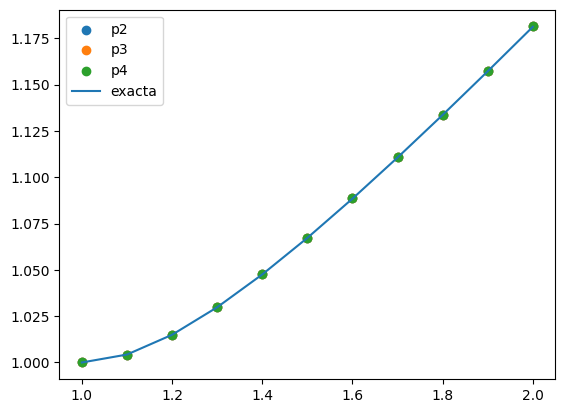

In [164]:
plt.scatter(ts,p2,label='p2')
plt.scatter(ts, p3,label='p3')
plt.scatter(ts, p4,label='p4')
plt.plot(ts, exacta,label='exacta')
plt.legend()
plt.show()

En la gráfica no podemos diferenciar cuál es mejor que otra, por lo que optamos por mirar los arreglos

In [153]:
np.abs(p2 - exacta)

array([0.00000000e+00, 2.24146647e-07, 3.10759472e-07, 3.46368782e-07,
       8.46393091e-06, 8.79398713e-05, 1.32418694e-04, 1.60862710e-04,
       1.74654650e-04, 1.82880245e-04, 1.87650818e-04])

In [147]:
np.abs(p3 - exacta)

array([0.00000000e+00, 2.24146647e-07, 3.10759472e-07, 3.46368782e-07,
       8.50021190e-06, 8.79065387e-05, 1.32384353e-04, 1.60829816e-04,
       1.74622180e-04, 1.82848231e-04, 1.87619119e-04])

In [165]:
np.abs(p4 - exacta)

array([0.00000000e+00, 2.24146647e-07, 3.10759472e-07, 3.46368782e-07,
       8.49972943e-06, 8.79069820e-05, 1.32384810e-04, 1.60830253e-04,
       1.74622612e-04, 1.82848656e-04, 1.87619541e-04])

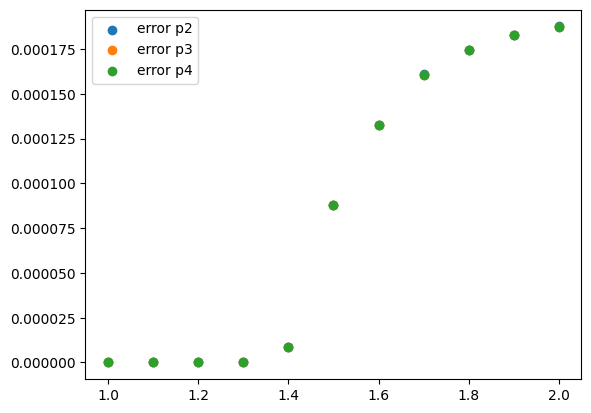

In [184]:
# Graficamos el error
plt.scatter(ts, np.abs(p2 - exacta),label='error p2')
plt.scatter(ts, np.abs(p3 - exacta),label='error p3')
plt.scatter(ts, np.abs(p4 - exacta),label='error p4')
plt.legend()
plt.show()

En la gráfica anterior tampoco se pueden observar mucho las diferencias, por lo que comparamos los errores uno a uno

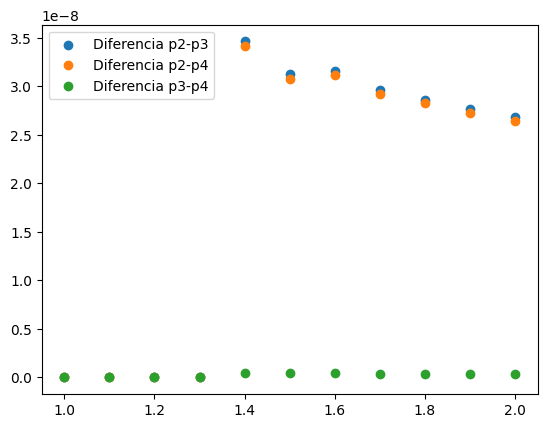

In [185]:
dif_p2p3 = np.abs((p2 - exacta) / exacta - (p3 - exacta) / exacta) 
dif_p2p4 = np.abs((p2 - exacta) / exacta - (p4 - exacta) / exacta)
dif_p3p4 = np.abs(((p3 - exacta) / exacta) - (p4 - exacta) / exacta) 

plt.scatter(ts, dif_p2p3, label='Diferencia p2-p3')
plt.scatter(ts, dif_p2p4, label='Diferencia p2-p4')
plt.scatter(ts, dif_p3p4, label='Diferencia p3-p4')
plt.legend()
plt.show()

Podemos observar que la diferencia p3-p4 no es mucha, por lo que nos concentramos en las diferencias de p2-p3 y p2-p4. Podemos notar que la diferencia p2-p3 es mayor. Por lo tanto, la mejor aproximación corresponde a p = 3